In [123]:
import os
import joblib as jl
import numpy as np
import glob
import matplotlib.pyplot as plt
import json

In [95]:
def load_jl(path, sim):
    ode_logs = []
    sim_logs = []
    for p in glob.glob(os.path.join(path, 'ode*')):
        jl_ode_log=jl.load(p)
        if sim:
            fn=os.path.join(path, p.split('/')[-1].replace('ode', 'sim'))
            if os.path.isfile(fn):
                jl_sim_log = jl.load(fn)
                sim_logs.append(jl_sim_log)
        ode_logs.append(jl_ode_log)
        
    args=json.load(open(os.path.join(path, 'args.json'), 'rb'))
    
    return ode_logs, sim_logs, args

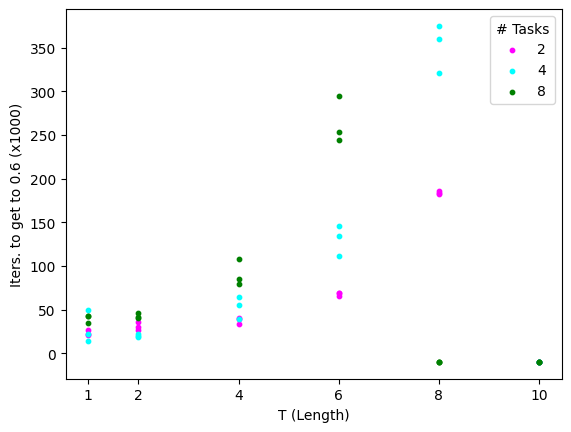

In [113]:
for i in task2_thr_dict.keys():
    task2=plt.scatter([i] * len(task2_thr_dict[i]), task2_thr_dict[i], c = 'magenta', s =10, label = '2')
    
plt.xticks(list(task2_thr_dict.keys()), list(task2_thr_dict.keys()))
plt.ylabel('Iters. to get to 0.6 (x1000)')
plt.xlabel('T (Length)')

for i in task4_thr_dict.keys():
    task4=plt.scatter([i] * len(task4_thr_dict[i]), task4_thr_dict[i], c = 'cyan', s =10, label = '4' )
    
for i in task8_thr_dict.keys():
    task8=plt.scatter([i] * len(task8_thr_dict[i]), task8_thr_dict[i], c = 'green', s =10, label = '8')

plt.legend(title = '# Tasks', handles = [task2, task4, task8] )

Text(0.5, 0, 'T (Length)')

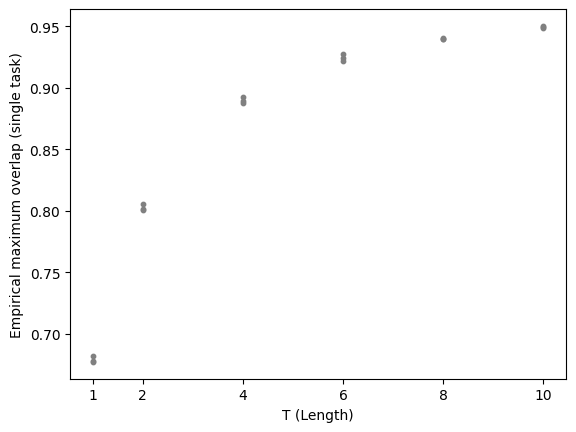

In [114]:
for i in sat_dict.keys():
    plt.scatter([i] * len(sat_dict[i]), sat_dict[i], c = 'gray', s =10)
    
plt.xticks(list(sat_dict.keys()), list(sat_dict.keys()))
plt.xticks(list(time_dict.keys()), list(time_dict.keys()))
plt.ylabel('Empirical maximum overlap (single task)')
plt.xlabel('T (Length)')

Text(0.5, 0, 'T (Length)')

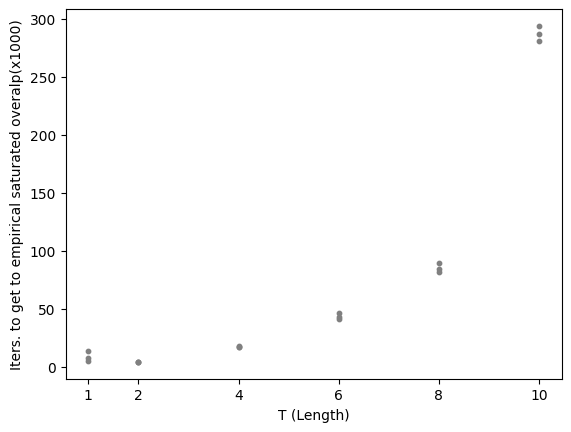

In [121]:
for i in time_thr_dict.keys():
    plt.scatter([i] * len(time_thr_dict[i]), time_thr_dict[i], c = 'gray', s =10)
plt.xticks(list(time_thr_dict.keys()), list(time_thr_dict.keys()))
plt.yticks(np.arange(0, 350, 50), np.arange(0, 350, 50))
plt.ylabel('Iters. to get to empirical saturated overalp(x1000)')
plt.xlabel('T (Length)')

Text(0.5, 0, 'T (Length)')

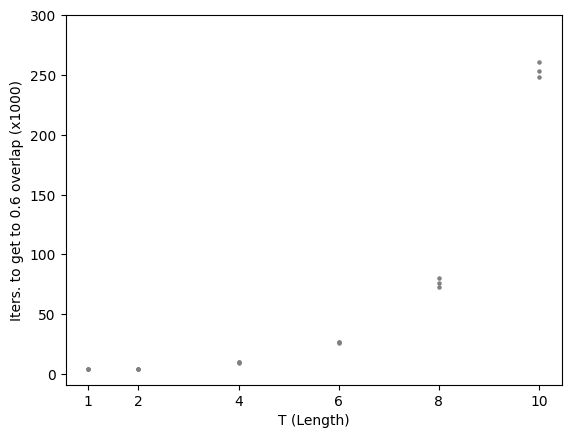

In [91]:
for i in time_dict.keys():
    plt.scatter([i] * len(time_dict[i]), time_dict[i], c = 'gray', s =5)
plt.xticks(list(time_dict.keys()), list(time_dict.keys()))
plt.yticks(np.arange(0, 350, 50), np.arange(0, 350, 50))
plt.ylabel('Iters. to get to 0.6 overlap (x1000)')
plt.xlabel('T (Length)')

In [ ]:
np.arange()

In [117]:
sat_dict

{4: [0.8925069323582258, 0.8892091611358891, 0.8877973903013958],
 1: [0.6769894752930672, 0.6778556746555287, 0.681515513607975],
 8: [0.9407961053588976, 0.9399537755880417, 0.9392887025774638],
 2: [0.8014312063918836, 0.8002071342410613, 0.8056353998296689],
 6: [0.9243001369344029, 0.9221256456830463, 0.9270975166323744],
 10: [0.9502574960109306, 0.948474930879638, 0.9496877474528659]}

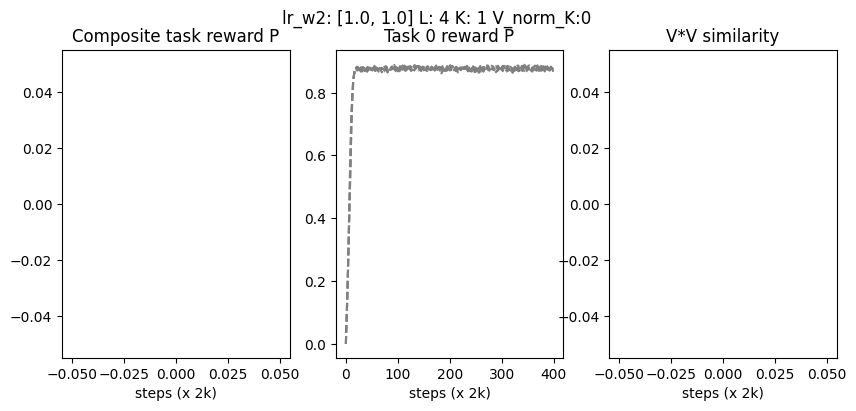

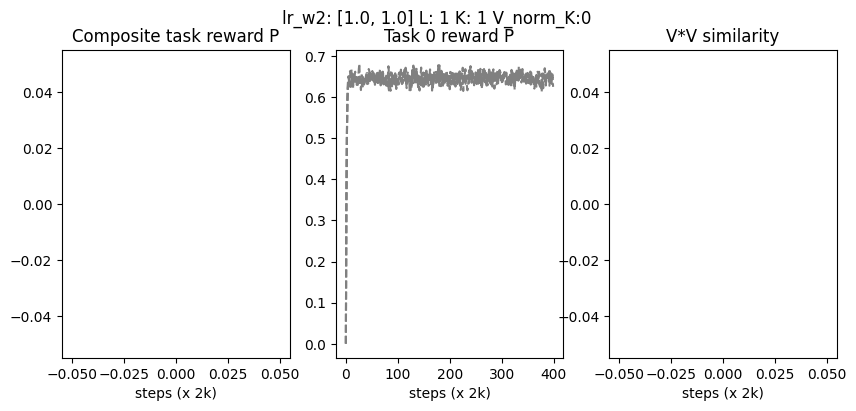

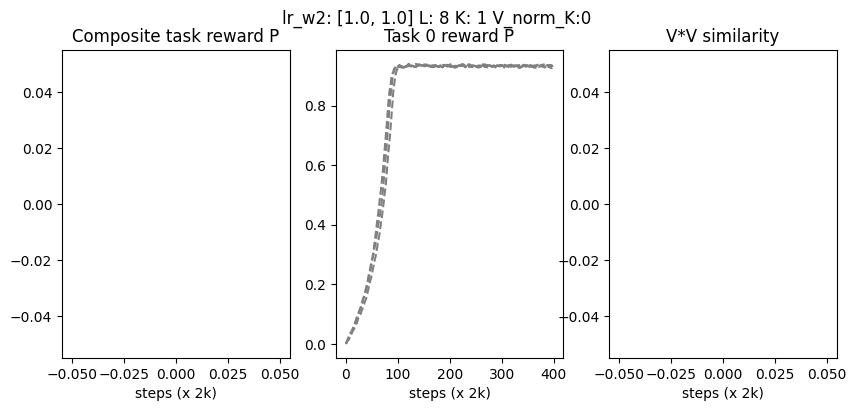

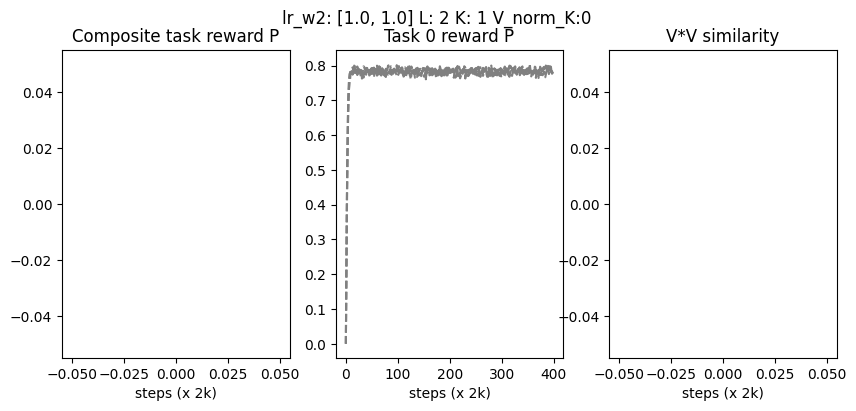

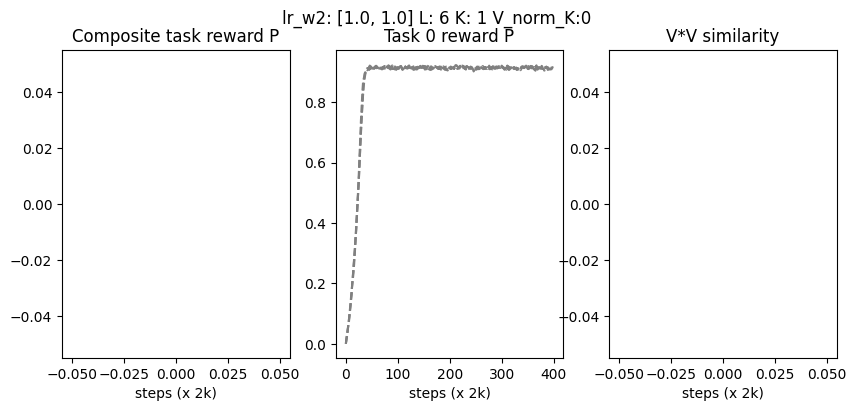

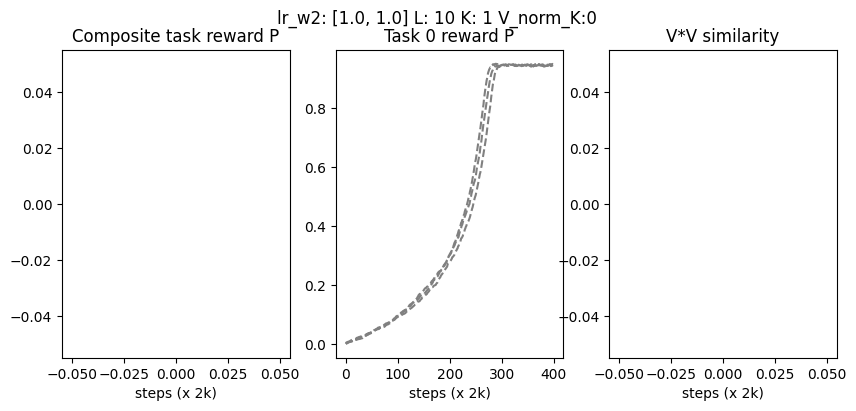

In [122]:
n_task = 4
v_norm = 0
seq_l = 4
time_thr_dict = {}
sat_thr_dict = {4: 0.87, 1: 0.65, 2: 0.6, 8:0.79, 6:0.91, 10: 0.94}
#task8_thr_dict = {}
for p in glob.glob('hrl_ode_logs/051023_single_task_saturation//*/'):
    ode_logs, sim_logs, args=load_jl(p, True)

    if args['lr_ws'][1]==1 and args['lr_v']==1 and args['v_norm']==0:
        fig=plt.figure(figsize=(10,4))
        fig.suptitle(f"lr_w2: {args['lr_ws']} L: {args['seq_length']} K: {args['num_tasks']} V_norm_K:{args['v_norm']}")
        ax1 = plt.subplot(131)
        ax2 = plt.subplot(132)
        ax3 = plt.subplot(133)
        for sl in sim_logs:
            ax1.set_title('Composite task reward P')
            #ax1.plot(np.concatenate([ol['nid']['phase1']['overlap_tilde'], ol['nid']['phase2']['overlap_tilde']]), c = 'gray')
            ax1.plot(sl['nid']['overlap_tilde'], ls ='--', c= 'gray')
            ax1.set_xlabel('steps (x 2k)')
            
            ax2.set_title(f'Task {k} reward P')
            #ax2.plot(np.concatenate([ol['nid']['phase1']['overlap'][:,k], ol['nid']['phase2']['overlap'][:,k]]), c = 'gray')
            ax2.plot(sl['nid']['overlap'][:,k], ls ='--', c= 'gray')
            ax2.set_xlabel('steps (x 2k)')
            
            ax3.set_title('V*V similarity')
            #ax3.plot(np.concatenate([ol['nid']['phase2']['VSVT']]), c = 'gray')
            ax3.plot(sl['nid']['VSVT'], ls ='--', c= 'gray')
            
            ax3.set_xlabel('steps (x 2k)')
            
            if args['seq_length'] in time_thr_dict.keys():
                time_thr_dict[args['seq_length']].append(np.where(sl['nid']['overlap']> sat_thr_dict[args['seq_length']])[0][0])
            else:
                time_thr_dict[args['seq_length']]= [np.where(sl['nid']['overlap']> sat_thr_dict[args['seq_length']])[0][0]]

            """
            if args['seq_length'] in task8_thr_dict.keys():
                try:
                    task8_thr_dict[args['seq_length']].append(np.where(sl['nid']['overlap_tilde']> 0.6)[0][0])
                except:
                    task8_thr_dict[args['seq_length']].append(-10)
            else:
                try:
                    task8_thr_dict[args['seq_length']]= [np.where(sl['nid']['overlap_tilde']> 0.6)[0][0]]
                except:
                    task8_thr_dict[args['seq_length']]= [-10]
            """

In [52]:
np.where(sl['nid']['overlap']>0.88)[0][0]

284

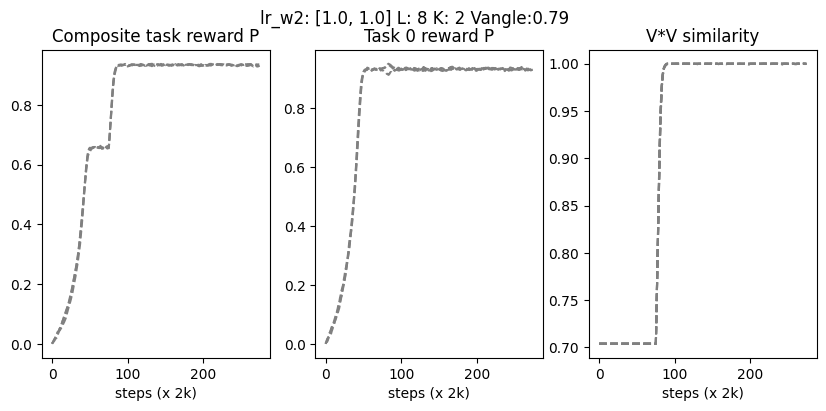

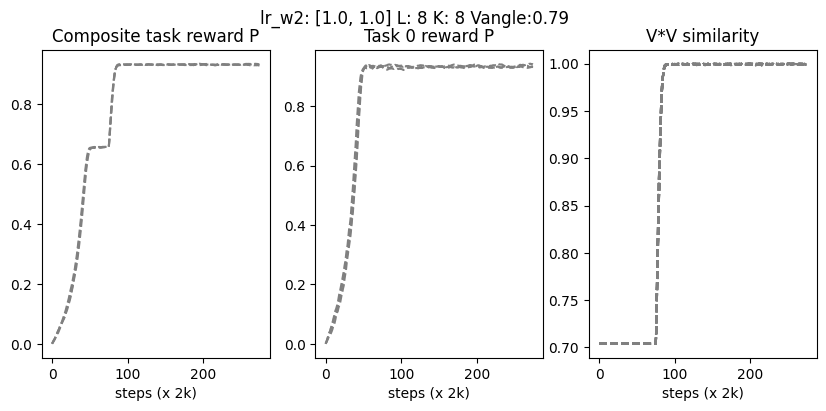

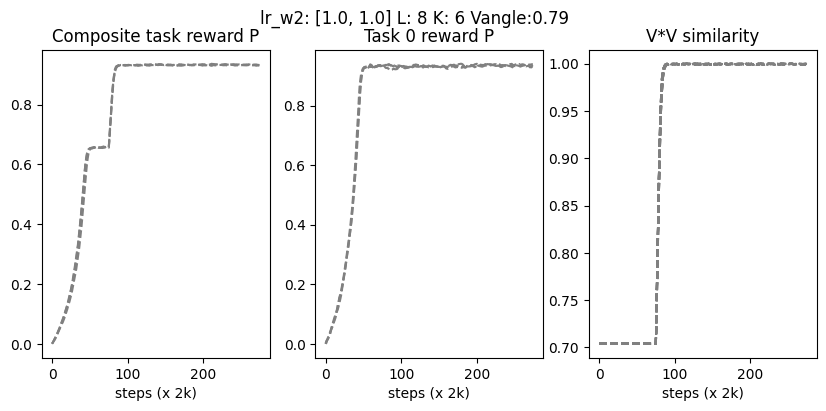

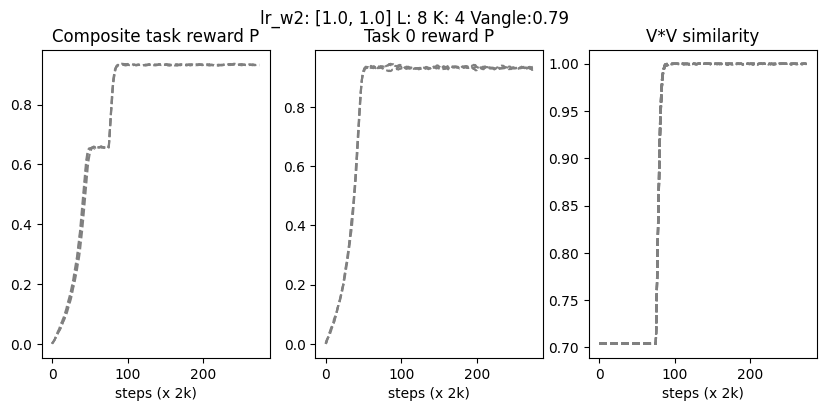

In [130]:
k=0
for p in glob.glob('hrl_ode_logs/121023_curriculum_saturation/*'):
    ode_logs, sim_logs, args=load_jl(p, True)
    if args['lr_ws'][1]==1 and args['lr_v']==1 and args['seq_length']==8 and args['v_norm']==0 and args['v_angle']==0.79:
        fig=plt.figure(figsize=(10,4))
        fig.suptitle(f"lr_w2: {args['lr_ws']} L: {args['seq_length']} K: {args['num_tasks']} Vangle:{args['v_angle']} ")
        ax1 = plt.subplot(131)
        ax2 = plt.subplot(132)
        ax3 = plt.subplot(133)
        for ol, sl in zip(ode_logs, sim_logs):
            ax1.set_title('Composite task reward P')
            ax1.plot(sl['nid']['overlap_tilde'], ls ='--', c= 'gray')
            ax1.set_xlabel('steps (x 2k)')
            
            ax2.set_title(f'Task {k} reward P')
            ax2.plot(sl['nid']['overlap'][:,k], ls ='--', c= 'gray')
            ax2.set_xlabel('steps (x 2k)')
            
            ax3.set_title('V*V similarity')
            ax3.plot(sl['nid']['VSVT'], ls ='--', c= 'gray')
            
            ax3.set_xlabel('steps (x 2k)')
            

In [132]:
np.max(sl['nid']['overlap'][:,0])

0.944481883690888

In [133]:
np.max(sl['nid']['overlap_tilde'])

0.9365511529500649

In [5]:
args

{'input_dim': 1000,
 'num_tasks': 8,
 'seq_length': 8,
 'vt_weights': [1.0, 1.0, 1.0, 1.0],
 'noise_scale': 0.0,
 'nums_iter': [400000, 400000],
 'lr_ws': [1.0, 1.0],
 'v_angle': 0.79,
 'lr_v': 1.0,
 'update_frequency': 4000,
 'logdir': 'hrl_ode_logs/210923_curriculum_numtasks/',
 'seeds': 3,
 'v_norm': 1}

In [145]:
ol['nid']['phase2']['R']

array([[[ 0.93337786, -0.37543972,  0.16205502, -0.12100799],
        [-0.42237567,  0.93337733, -0.07855204, -0.30318308],
        [-0.09842599,  0.06520125,  0.93337742,  0.18701675],
        [-0.36979723, -0.11545857, -0.12899461,  0.9333775 ]],

       [[ 0.93380732, -0.37543972,  0.16205502, -0.12100799],
        [-0.42237567,  0.93254982, -0.07855204, -0.30318308],
        [-0.09842599,  0.06520125,  0.93274938,  0.18701675],
        [-0.36979723, -0.11545857, -0.12899461,  0.93311184]],

       [[ 0.9344854 , -0.37543972,  0.16205502, -0.12100799],
        [-0.42237567,  0.93154312, -0.07855204, -0.30318308],
        [-0.09842599,  0.06520125,  0.93194978,  0.18701675],
        [-0.36979723, -0.11545857, -0.12899461,  0.93316362]],

       ...,

       [[ 0.93326005, -0.37543972,  0.16205502, -0.12100799],
        [-0.42237567,  0.93326005, -0.07855204, -0.30318308],
        [-0.09842599,  0.06520125,  0.93326005,  0.18701675],
        [-0.36979723, -0.11545857, -0.12899461,  0.

0.7197604276808444
[1.03994567 0.93916214 1.05337793 0.98828665 0.96416544 0.96653806
 1.05177651 0.99001377]
0.7197604276806953
[1.01783677 0.95716002 1.01151204 1.01572462 0.98268538 1.01784728
 1.01605261 0.97926163]
0.7197604276809116
[0.99446513 0.97282349 0.99112258 1.03351276 1.02530054 0.99323437
 0.95241473 1.03408482]


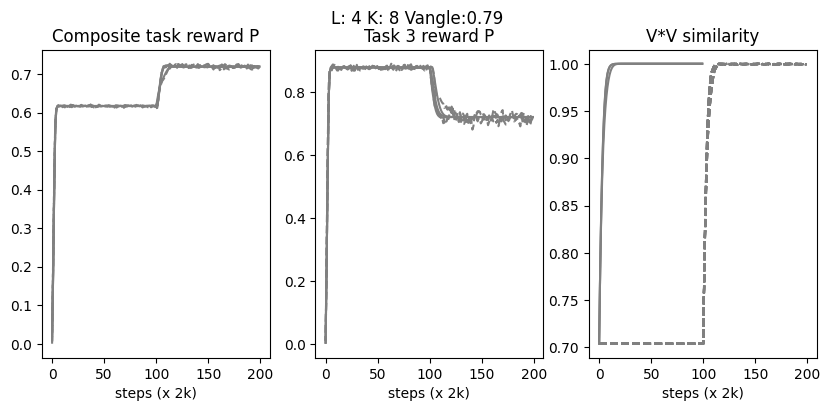

In [183]:
k=3
fig=plt.figure(figsize=(10,4))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
for p in glob.glob('hrl_ode_logs/210923_curriculum_numtasks/*/'):
    ode_logs, sim_logs, args=load_jl(p, True)
    
    if args['lr_ws'][1]==1 and args['lr_v']==1 and args['num_tasks']==8 and args['seq_length']==4 and args['v_norm']==1 :
        fig.suptitle(f"L: {args['seq_length']} K: {args['num_tasks']} Vangle:{args['v_angle']}")
        for ol, sl in zip(ode_logs, sim_logs):
            print(ol['nid']['phase2']['overlap_tilde'][-1])
            ax1.set_title('Composite task reward P')
            ax1.plot(np.concatenate([ol['nid']['phase1']['overlap_tilde'], ol['nid']['phase2']['overlap_tilde']]), c = 'gray')
            ax1.plot(sl['nid']['overlap_tilde'], ls ='--', c= 'gray',)
            ax1.set_xlabel('steps (x 2k)')
            
            ax2.set_title(f'Task {k} reward P')
            ax2.plot(np.concatenate([ol['nid']['phase1']['overlap'][:,k], ol['nid']['phase2']['overlap'][:,k]]), c = 'gray', )
            ax2.plot(sl['nid']['overlap'][:,k], ls ='--', c= 'gray',)
            ax2.set_xlabel('steps (x 2k)')
            
            ax3.set_title('V*V similarity')
            ax3.plot(np.concatenate([ol['nid']['phase2']['VSVT']]), c = 'gray', )
            ax3.plot(sl['nid']['VSVT'], ls ='--', c= 'gray')
            print(sl['nid']['VS'][-1])
            ax3.set_xlabel('steps (x 2k)')

In [171]:
sl['nid']['VS'][-1]

array([ 0.35519704,  0.35847719,  0.34259202,  0.36264754, -0.34989764,
        0.35706541, -0.36072546,  0.34117404])

In [148]:
args

{'input_dim': 1000,
 'num_tasks': 4,
 'seq_length': 8,
 'vt_weights': [1.0, 1.0, 1.0, 1.0],
 'noise_scale': 0.0,
 'nums_iter': [200000, 400000],
 'lr_ws': [1.0],
 'v_angle': 0.79,
 'lr_v': 1.0,
 'update_frequency': 2000,
 'logdir': 'hrl_ode_logs/120923_curriculum_numtasks/',
 'seeds': 3}

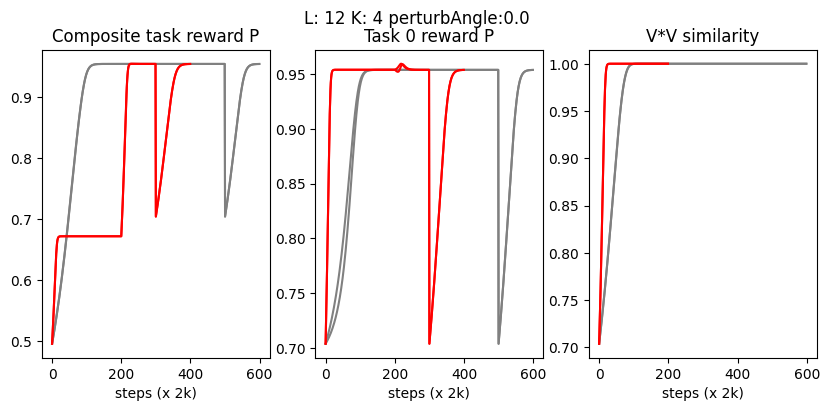

In [85]:
k=0
n_task = 4
v_norm = 1
seq_l = 12
perturb_angle = 0.0
for p in glob.glob('hrl_ode_logs/220923_baseline_perturbation/*'):
    ode_logs, sim_logs, args=load_jl(p, False)
    if args['seq_length']==seq_l and args['num_tasks']==n_task and args['perturbation_angle']==perturb_angle:
        fig=plt.figure(figsize=(10,4))
        fig.suptitle(f"L: {args['seq_length']} K: {args['num_tasks']} perturbAngle:{args['perturbation_angle']}")
        ax1 = plt.subplot(131)
        ax2 = plt.subplot(132)
        ax3 = plt.subplot(133)
        for ol in ode_logs:
            ax1.set_title('Composite task reward P')
            ax1.plot(np.concatenate([ol['regular']['phase2']['overlap_tilde'], 
                                     ol['perturbation']['phase2']['overlap_tilde']]), c = 'gray')
            
            ax1.set_xlabel('steps (x 2k)')
            
            ax2.set_title(f'Task {k} reward P')
            ax2.plot(np.concatenate([ol['regular']['phase2']['overlap'][:,k], 
                                     ol['perturbation']['phase2']['overlap'][:,k]]), c = 'gray')
            
            ax2.set_xlabel('steps (x 2k)')
            
            ax3.set_title('V*V similarity')
            ax3.plot(np.concatenate([ol['regular']['phase2']['VSVT'], 
                                     ol['perturbation']['phase2']['VSVT']]), c = 'gray')

            
            ax3.set_xlabel('steps (x 2k)')
        for p in glob.glob('hrl_ode_logs/220923_curriculum_perturbation/*'):
            ode_logs, sim_logs, args=load_jl(p,False)            
            if  args['seq_length']==seq_l and args['num_tasks']==n_task and args['perturbation_angle']==perturb_angle:
                ax1 = plt.subplot(131)
                ax2 = plt.subplot(132)
                ax3 = plt.subplot(133)
                for ol in ode_logs:
                    ax1.set_title('Composite task reward P')
                    ax1.plot(np.concatenate([ol['regular']['phase1']['overlap_tilde'],
                                             ol['regular']['phase2']['overlap_tilde'],
                                             ol['perturbation']['phase2']['overlap_tilde']]), c = 'red')
                    
                    ax1.set_xlabel('steps (x 2k)')

                    ax2.set_title(f'Task {k} reward P')
                    ax2.plot(np.concatenate([ol['regular']['phase1']['overlap'][:,k], 
                                             ol['regular']['phase2']['overlap'][:,k], 
                                             ol['perturbation']['phase2']['overlap'][:,k]]), c = 'red')
                    
                    ax2.set_xlabel('steps (x 2k)')

                    ax3.set_title('V*V similarity')
                    ax3.plot(np.concatenate([ol['regular']['phase2']['VSVT'],
                                            ol['perturbation']['phase2']['VSVT']]), c = 'red')
                    

                    ax3.set_xlabel('steps (x 2k)')


In [89]:
ol['regular']['phase2']['R'][:,k]

array([[ 0.95407719, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.95376901, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.95346973, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.95318378, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.95291681, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.95267602, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.95247052, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.95231169, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.95221361, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.95219326, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.95227039, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.95246656, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.95280292, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.95329562, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.95394886, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.95474607, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.95564269, -0.

In [90]:
ol['perturbation']['phase2']['R'][:,k]

array([[ 0.70384717, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.70757626, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.7113499 , -0.00588935,  0.1770857 , -0.15742983],
       [ 0.71516852, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.71903254, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.72294234, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.72689823, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.7309005 , -0.00588935,  0.1770857 , -0.15742983],
       [ 0.73494935, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.73904492, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.74318727, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.74737639, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.75161215, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.75589431, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.7602225 , -0.00588935,  0.1770857 , -0.15742983],
       [ 0.76459622, -0.00588935,  0.1770857 , -0.15742983],
       [ 0.76901481, -0.